# SIR Model for  COVID-19:  Estimating $R_0$

<p class="pm-node nj-authors">Roberto Berwa, MIT [berwa.mit.edu]</p>

At the beginning of pandemic with a limited amount of data and knowledge of the transmission mechanisms behind COVID-19, various models from the scientific community, mathematicians, and epidemiologists, were useful in gauging a general view of how the pandemic would develop. 

In this article, we discuss the most basic mathematical model of an infectious disease: SIR model, and we also use the model to estimate the basic reproductive number. We estimate the $R_0$ to be  **4.90 (95% CI 4.67294, 5.13887) in the US,** which agrees with the most recent study based on early data from Wuhan, China whose estimates sets $R_0$ median value at 5.7 (95% CI 3.8–8.9) (Sanche, Lin, Xu, Romero-Severson, Hengartner and Ke 2020)**.**  

Here is what is covered in this article. $$

- [x] SIR model description 
- [x] Solve SIR ODE's
- [x] Estimating $R_0$
- [x] General use of this model

**Disclaimer: The author of this article has no considerable expertise in the subject of the matter discussed. Opinions and results shown in this document should not be referenced or used while taking any decisions unless advised by an expert or a specialist.** 

# Model Description: SIR MODEL 

In mathematical modeling for infectious diseases, models can be of two types: stochastic (probabilistic) and deterministic. Stochastic models tend to be more complicated to analyze than deterministic models, but they also tend to be very useful as well. I will discuss a deterministic SIR model using ordinary differential equations. 

## Compartments of SIR model 

The SIR model, originating from the 1700s, classifies a fixed population into three compartments at a given time: S(t) (susceptible group), I(t) (infected group), and R(t) (Recovered) (Kermack and  McKendrick  1927). 

* S(t): From a fixed population, this group counts the number of people who are susceptible to being infected at the time t. 
* I(t): The number of people who are currently infectious at time t. (i.e. people who can infect other people).
* R(t): people who are no longer infectious at time t, either because they have been cured or unfortunately because they died.  

In this model, the population moves from being susceptible to infected and from infected to recovery.  $S(t) \rightarrow I(t) \rightarrow R(t)$

From S to I compartment, effective contact between an infected person and an infectious person must take place. **Effective contact** is defined as an interaction between a susceptible person and an infectious person that results in the susceptible person getting infected.  The effective contact rate per infectious person, $\sigma$, is defined as the average number of people that an infected patient can infect per unit time. This can be computed from the transmission risk, **p**, the probability of infecting a susceptible person with whom an infected patient is in contact, and the number of total contacts with susceptible people, $\tau$. 

$$
\tau = \frac {\eta S}{N} \;(eq.1)
$$
$\eta$, the average number of people that a person comes in contact with per unit time. 

$$
\sigma = \tau * p \;(eq.2)
$$
$$
\sigma = \frac{\eta S}{N}* p \;(eq.3)
$$
Let's define $\beta$, the number of people infected by an infectious person given that all people in his/her contact are susceptible. 

$$
\beta = \eta * p \;(eq.4)
$$
(i.e. we replace (eq.4) into (eq.3) to find (eq.5))

From I to R compartment, let $\gamma
$ be the probability that a person may recover at a time t.  

## Mathematical description of the model

Here is the mathematical expression of the model in the ODE(ordinary differential equation) form. 

$$
$$
$$
\frac{dS(t)}{dt}  = - \beta \frac{S(t) I(t)}{N} \;\;\; (eq.5)\\
$$
$$
\frac{dI(t)}{dt}  =  \beta  \frac{S(t) I(t)}{N} - \gamma I \;\;\; (eq.6) \\
$$
$$
\frac{dR(t)}{dt}  = \gamma I(t) \; \; \; (eq.7)
$$
## Dependent variable 

For this article, we focus on the ratio of $\beta$ to $\gamma$ which is known as the **basic reproductive number,** $R_0$, defined as the **expected number** of cases directly generated by one case in a population where all individuals are susceptible to infection. This ratio is useful to determine if the virus will become an epidemic or not. When $R_0$ > 1, the infectious disease evolves into an epidemic.   

## Assumptions 

As already implied in the equations, there are various assumptions taken into account. First, the probability of contracting the disease or recovering from it is the same for everyone. Second, we have a fixed population. In the case of a pandemic that would mean that there are no births or deaths and that the net international migrant is zero. (The veracity of these assumptions are revisited in section 4.)

$$
N = I(t) + S(t) + R(t) \; (eq.8)
$$
# Solving SIR ODE model in Julia

The differential equations describing the model can be defined in various methods, the most basic being the Euler method. However, in this case, we will solve the ODE system using DifferentialEquations.jl , a well-optimized package in Julia built in consultation with the most recent techniques in the research of algebraic computation. ([Julia benchmarks better than most single-purpose languages.](https://julialang.org/benchmarks/) )

To reduce the number of variables in the model and to avoid estimating the population, we set the ratio $\beta$ to N to just $\beta$.

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


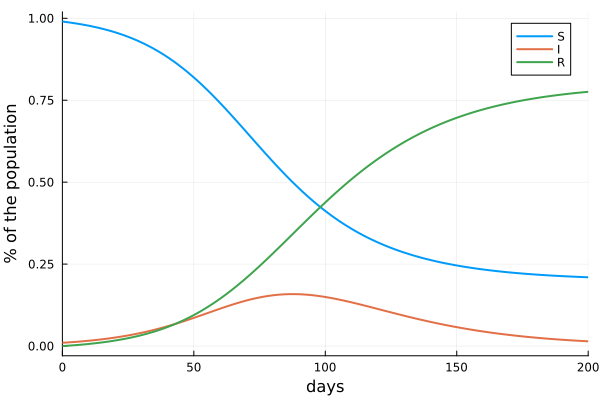

In [90]:
using Pkg;
Pkg.add("DifferentialEquations");
using Plots
using DifferentialEquations;

# define the parameters:
function sir_ode!(δu, u, p,  t)
    
    # unpack variables and parameters:
    S, I, R = u
    β, γ = p   
    
    # define differential equations:
    δS = -β*S*I
    δI = +β*S*I - γ*I
    δR = +γ*I
    
    δu .= (δS, δI, δR)   # copy the values into the vector du; note the `.`
  	δu
end

# define the paramaters:
β = 0.1
γ = 0.05
parameters = [β, γ]

# define the initital values:
S₀ = 0.99 
I₀ = 0.01
R₀ = 0.0

initial_values = [S₀, I₀, R₀]

time_span = [0.0, 200.0]  # initial and final time

# set up problem:
problem = ODEProblem(sir_ode!, initial_values, time_span, parameters)

#solution:
solution = solve(problem, saveat = 0.1);

#plot:
plot(solution, label=["S" "I" "R"], Title = "SIR Model Evolution", ylabel = "% of the population", xlabel = "days",linewidth=2)

In [91]:
R_0=0.46
β=0.5
γ=R_0*β
p=[β,γ]

2-element Vector{Float64}:
 0.5
 0.23

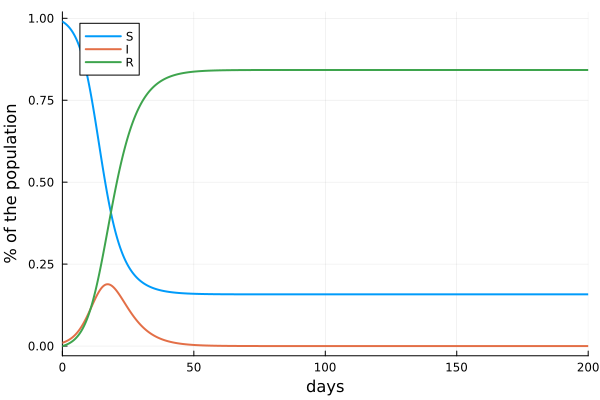

In [92]:
newprob = remake(problem, p=p)
newsol = solve(newprob, Euler(),dt=0.1)
plot(newsol,label=["S" "I" "R"], Title = "SIR Model Evolution", ylabel = "% of the population", xlabel = "days",linewidth=2)

Given that $\frac{\beta}{N} = 0.1 \And \gamma = 0.05$, from our experiment when we start with the scenario with 0.01 people are infectious, the infection will pick at 18% of the population. This case does not reflect COVID-19. (The interpretation is visited in Section 4).

# Fitting the model 

 Models can be useful in estimating some key characteristics of an epidemic. It can estimate the recovery rate ($\gamma$) and the number of people infected by an infectious person given that all people in his/her contact are susceptible ($\beta$). Here, we only estimate $R_0$.

## Methodology

We use the analytical solution to our ODEs and estimate the dependent variable using a non-linear least squares concept. 

For non-linear least squares, the most common method is **the Levenberg-Marquardt algorithm**, (**LMA** ), also known as the **Damped least-squares** (**DLS**) method. It interpolates between the Gauss-Newton algorithm and gradient descent for efficiency (Gavin 2019). This article uses its implementation in Julia, but it is very popular and available in most programming languages. 

## Data Manipulation 

We use the data from the Center for Systems Science and Engineering, John Hopkins' Whiting School of Engineering. We will focus on one country, the US. This data is not the most accurate, but the errors in the data are mainly due to external factors, such as lack of testing for those exposed. 

As part of the model's assumptions, we fix the population of the US at 329,686,270, as of May 2020.  Note that the US Census estimates about one birth every 8 seconds and one death every 12 seconds. However, we ignore these rates. More complicated, and possibly accurate, models take them into account.

In [93]:
using DataFrames
using Dates
using Plots
using CSV

# donwload the data:
download_data=true

if download_data
    url_confirmed_cases= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
    url_death = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
    url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
    download(url_confirmed_cases, "data/confirmed_cases_global.csv");
    download(url_death, "data/death_global.csv");
    download(url_recovered, "data/recovered_global.csv");
end 

# read, clean and view the data:
data_confirmed_cases = CSV.File("data/confirmed_cases_global.csv");
data_death = CSV.File("data/death_global.csv");
data_recovered = CSV.File("data/recovered_global.csv");


In [94]:
data_confirmed_cases=DataFrame(data_confirmed_cases);
data_death=DataFrame(data_death);
data_recovered=DataFrame(data_recovered);

In [95]:
data_death

289×1147 DataFrame
 Row │ Province/State                Country/Region        Lat       Long      ⋯
     │ String?                       String                Float64?  Float64?  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ missing                       Afghanistan            33.9391   67.71    ⋯
   2 │ missing                       Albania                41.1533   20.1683
   3 │ missing                       Algeria                28.0339    1.6596
   4 │ missing                       Andorra                42.5063    1.5218
   5 │ missing                       Angola                -11.2027   17.8739  ⋯
   6 │ missing                       Antarctica            -71.9499   23.347
   7 │ missing                       Antigua and Barbuda    17.0608  -61.7964
   8 │ missing                       Argentina             -38.4161  -63.6167
  ⋮  │              ⋮                         ⋮               ⋮         ⋮      ⋱
 283 │ missing                       Venezuela               6.4238  -66.5897  ⋯
 284 │ missing                       Vietnam                14.0583  108.277
 285 │ missing                       West Bank and Gaza     31.9522   35.2332
 286 │ missing                       Winter Olympics 2022   39.9042  116.407
 287 │ missing                       Yemen                  15.5527   48.5164  ⋯
 288 │ missing                       Zambia                -13.1339   27.8493
 289 │ missing                       Zimbabwe              -19.0154   29.1549
                                               1143 columns and 274 rows omitted

In [96]:
data_confirmed_cases=rename(data_confirmed_cases, [2 => :country]);
data_death=rename(data_death, [2 => :country]);
data_recovered=rename(data_recovered, [2 => :country]);

In [97]:
data_us_confirmed= data_confirmed_cases[data_confirmed_cases.country .== "US",:];
data_us_death = data_death[data_death.country .== "US", :];
data_us_recovered = data_recovered[data_recovered.country .== "US", :];

In [98]:
date_strings = String.(names(data_confirmed_cases))[5:end];
format = Dates.DateFormat("m/d/Y");
dates = parse.(Date, date_strings, format) .+ Year(2000);

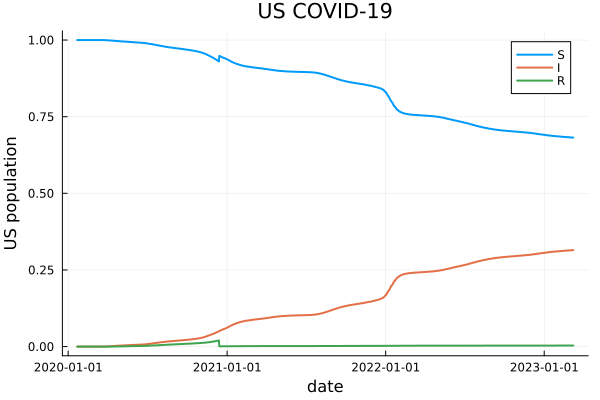

In [99]:
# plot the data on graph: 
p = plot(title="US COVID-19", ylabel = "US population", xlabel = "date");
us_confirmed_vec = vec(Array(data_us_confirmed[:,5:end]));
us_recovered_vec = vec(Array(data_us_recovered[:,5:end]));
us_death_vec = vec(Array(data_us_death[:,5:end]));
us_tot_recovered_vec = vec(Array(data_us_recovered[:,5:end])) + vec(Array(data_us_death[:,5:end]));
us_total_agents = us_tot_recovered_vec + us_confirmed_vec;

us_population = 329686270;
us_susceptible_vec = us_population .- us_total_agents;

plot!(dates, us_susceptible_vec./us_population, label = "S",linewidth=2)
plot!(dates, us_confirmed_vec./us_population, label = "I",linewidth=2)
plot!(dates, us_tot_recovered_vec./us_population, label = "R",linewidth=2)




From the graph, the total number of cases in the number of confirmed cases grows exponentially, which implies that our model captures some general description of the pandemic, as the solution to the model results in an exponential form. (i.e. This can be checked by plotting the log of the plot). 

( In the dataset, Infected refers to the total number cases recorded, not active cases. And in the graph, Infected + Death is the recovered compartment discussed in section 1. )

## Estimating the basic reproductive number

To solve for $R_0
$, we use the exact analytical solution of the evolution of the SIR model. (Harko, Lobo, and Mak 2014)

$$
u(t) = e^{\frac{-\beta}{N*\gamma}* R(t)} \;\;\; (eq.9)
$$
$$
S(t) = N * u(t) \;\;\; (eq.10)
$$
$$
I(t) = N + \frac{\gamma*N}{\beta}* ln(u(t)) - N * u(t) \;\;\; (eq.11)
$$
$$
R(t) = - \frac{\gamma*N}{\beta}* ln(u(t)) \;\;\; (eq.12)
$$
We solve for I(t). 

$$
I(t) = N - R(t) - S(t) \;\;\; (eq.14)
$$
$$
I(t) = N - R(t) - N * e^{\frac{-\beta}{N*\gamma}* R(t)} \;\;\; (eq.15)
$$
$$
$$
We solve the model for parameters that minimizes the least-squares using LMA. Because it does not guarantee to find the global minimum, we pick a few random initial parameters to increase the likelihood of falling into a global minimum. 

In [100]:
us_susceptible_vec= us_susceptible_vec./us_population;
us_confirmed_vec= us_confirmed_vec./us_population;
us_tot_recovered_vec= us_tot_recovered_vec./us_population;

In [101]:
β = 0.5
γ = 0.1
parameters = [β, γ]

time_span = [800, 1000]  # initial and final time


# define the initital values:
S₀ = us_susceptible_vec[time_span[1]]; 
I₀ = us_confirmed_vec[time_span[1]];
R₀ = us_tot_recovered_vec[time_span[1]]; 
initial_values = [S₀, I₀, R₀];
# set up problem:
problem = ODEProblem(sir_ode!, initial_values, time_span, parameters);

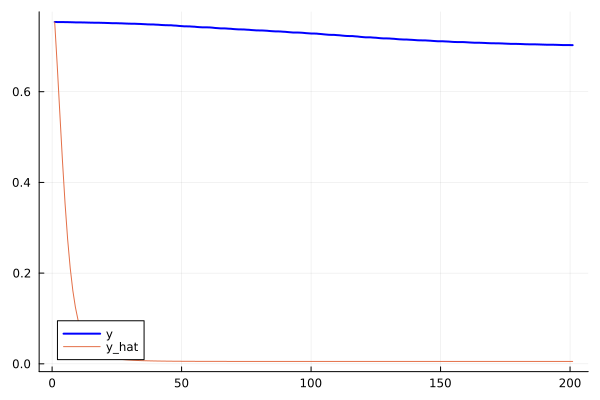

In [102]:
#solution:
solution = solve(problem, saveat = 1.0);

#plot:
y_hat=[u[1] for u in solution.u]
y=us_susceptible_vec[time_span[1]:time_span[2]]
plot(y,color="blue",linewidth=2,label="y")
plot!(y_hat,linedwidth=2,label="y_hat")

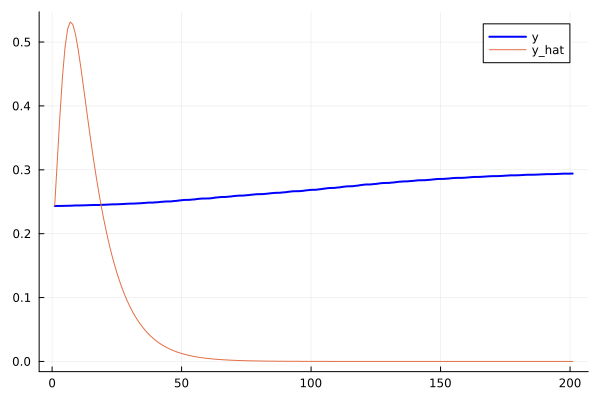

In [103]:
y_hat=[u[2] for u in solution.u]
y=us_confirmed_vec[time_span[1]:time_span[2]]
plot(y,color="blue",linewidth=2,label="y")
plot!(y_hat,linedwidth=2,label="y_hat")

In [104]:
y1=[us_susceptible_vec[time_span[1]:time_span[2]]]
y2=[us_confirmed_vec[time_span[1]:time_span[2]]]
y3=[us_tot_recovered_vec[time_span[1]:time_span[2]]]

sum((reduce(hcat,[y1 y2 y3])-reduce(hcat,solution.u)').^2)

292.20316051524776

Using the analytical method, we cannot find the actual values of β and γ, but we can find the $R_0$, which in this case of COVID-19 in the U.S is estimated to be **4.90 (95% CI 4.67294, 5.13887)**, statistically significant. Early estimations of the reproductive number, using a hybrid deterministic–stochastic SEIR (susceptible-exposed-infectious-recovered) model, **sets its median value at 5.7 (95% CI 3.8–8.9**) (Sanche, Lin, Xu, Romero-Severson, Hengartner and Ke 2020). 

## Visualize the fitted model 

Due to its limitations, a deterministic SIR model weakly captures the details of the evolution of the pandemic. It should not be taken as an exact predicting tool for COVID-19, at least from our judgment (refer to section 4.). However, it still captures some general aspects of the model. For instance, it still captures the exponential growth characteristic of COVID-19 as seen in the plot below. 

In [105]:
using Pkg;

Pkg.add("Optim");

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [106]:
time_span

2-element Vector{Int64}:
  800
 1000

In [107]:
function ode_loss(parameters)
    # define the initital values:
    S₀ = us_susceptible_vec[time_span[1]]; 
    I₀ = us_confirmed_vec[time_span[1]];
    R₀ = us_tot_recovered_vec[time_span[1]]; 
    initial_values = [S₀, I₀, R₀];
    problem = ODEProblem(sir_ode!, initial_values, time_span, parameters);
    solution = solve(problem, saveat = 1.0);
    y1=[us_susceptible_vec[time_span[1]:time_span[2]]]
    y2=[us_confirmed_vec[time_span[1]:time_span[2]]]
    y3=[us_tot_recovered_vec[time_span[1]:time_span[2]]]
    return sum((reduce(hcat,[y1 y2 y3])-reduce(hcat,solution.u)').^2)
end

ode_loss (generic function with 1 method)

In [169]:
using Optim

time_span = [1, 200]
lower = [0.0,0.0]
upper = [2.0, 2.0]
initial=[0.5,0.05]
result = Optim.optimize(ode_loss, lower,upper,initial);

In [170]:
ode_loss(upper)

0.021756162068846046

In [171]:
fitted_params=Optim.minimizer(result)

2-element Vector{Float64}:
 0.11357464300502669
 0.03217524450645255

In [172]:
fitted_params[1]/fitted_params[2]

3.529876610020787

In [173]:
S₀ = us_susceptible_vec[time_span[1]]; 
I₀ = us_confirmed_vec[time_span[1]];
R₀ = us_tot_recovered_vec[time_span[1]]; 
initial_values = [S₀, I₀, R₀];
problem = ODEProblem(sir_ode!, initial_values, time_span, fitted_params);
solution = solve(problem,Euler(),dt=1.0);


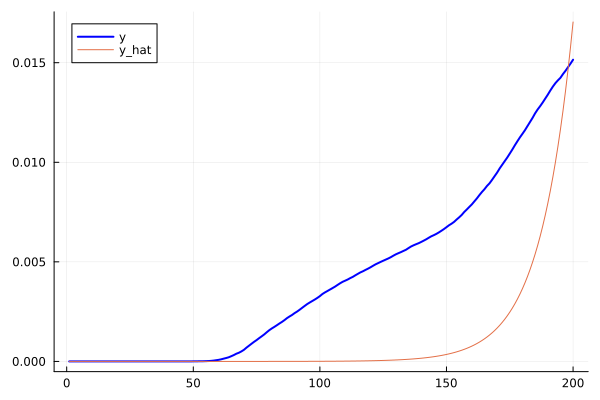

In [174]:
#plot:
y_hat=[u[2] for u in solution.u]
y=us_confirmed_vec[time_span[1]:time_span[2]]
plot(y,color="blue",linewidth=2,label="y")
plot!(y_hat,linedwidth=2,label="y_hat")

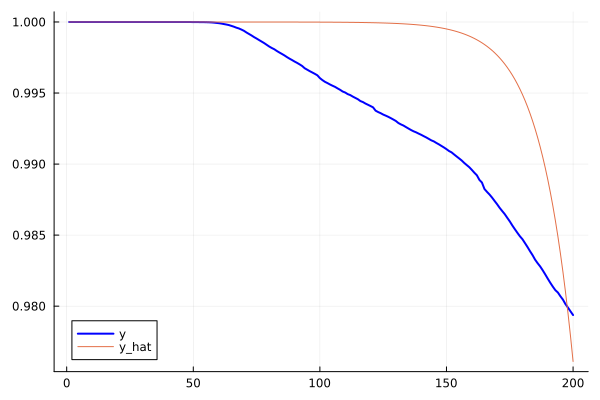

In [175]:
y_hat=[u[1] for u in solution.u]
y=us_susceptible_vec[time_span[1]:time_span[2]]
plot(y,color="blue",linewidth=2,label="y")
plot!(y_hat,linedwidth=2,label="y_hat")

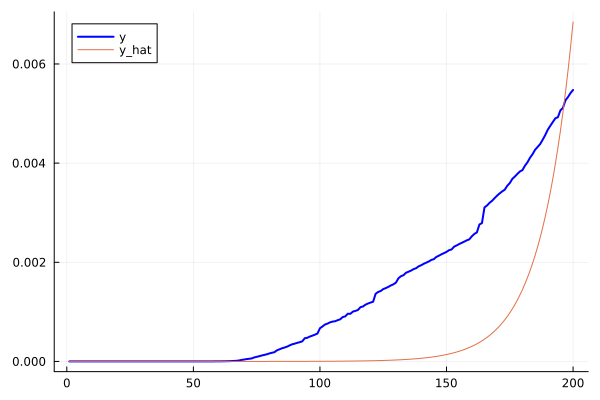

In [176]:
y_hat=[u[3] for u in solution.u]
y=us_tot_recovered_vec[time_span[1]:time_span[2]]
plot(y,color="blue",linewidth=2,label="y")
plot!(y_hat,linedwidth=2,label="y_hat")

# General thoughts on using this model

Most about scientific modeling can be summarised with an aphorism commonly used in the statistics community, **"All models are wrong, but some of them are useful."** By informal definition, modeling is a process of creating a simple representation of complex systems that captures the general underlying truth about the system. The more complicated, the better the assumptions are, and the more the results are accurate. However, taking solid assumptions makes it hard, sometimes even impossible, to analyze. SIR model is built on assumptions (look at section 1) that are not a reasonable reflection of the real world. Beyond the assumptions, the model does not take into account changes in policies and measures put into effect to reduce the spread of COVID-19 and will not self-correct when given incomplete data(as is the case due to poor testing ability in the early days of the pandemic). This excludes the use of such simplistic models to compute or predict specific parameters such as death rate, infection rate, and the number of infectious people in 2 weeks. However, such a model can still be useful in skeptically estimating parameters such as the basic reproductive number. 

Some of the issues mentioned of SIR are addressed **using more complex models (stochastic derivations of SIR model, spatial models, or Bayesian tree model) and performing different tests(anti-body testing) to gauge the correct number of infections**.  

# Appendix 

To check out the source code, click on the upward-pointing arrow of "show source code" if the source code is not visible.

# **References**

1. Harko, Tiberiu,  Lobo, Francisco S.N., and Mak, M.K. (2014)“Exact Analytical Solutions of the Susceptible-Infected-Recovered (SIR) Epidemic Model and of the SIR Model with Equal Death and Birth Rates.” Applied Mathematics and Computation 236: 184–194. Crossref. Web.
2. Gavin, Henri P.(2013) “The Levenberg-Marquardt method for nonlinear least-squares curve-fitting problems”.
3. Kermack, W. O.,  McKendrick, A. G (1927). "A Contribution to the Mathematical Theory of Epidemics". *Proceedings of the Royal Society A*. **115** (772): 700–721. 
4. Sanche S, Lin YT, Xu C, Romero-Severson E, Hengartner N, Ke R.(2020) High contagiousness and rapid spread of severe acute respiratory syndrome coronavirus 2. Emerg Infect Dis. <https://doi.org/10.3201/eid2607.200282>
5. https://pure.uai.cl/en/publications/estimating-sir-model-parameters-from-data-using-differential-evol